<a href="https://www.kaggle.com/code/shubhammisar/emotion-classification-word2vec-svm?scriptVersionId=134979824" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-classification-nlp/emotion-labels-train.csv
/kaggle/input/emotion-classification-nlp/emotion-labels-val.csv
/kaggle/input/emotion-classification-nlp/emotion-labels-test.csv


## Data

## Topic Emotion Classification

Topic Emotion Classification is an NLP task that predicts the emotional content or sentiment associated with a given topic or text. It aims to understand the underlying emotion expressed within the text, such as joy, sadness, anger, fear, or surprise.

Importance:
- Sentiment analysis and opinion mining
- Customer feedback analysis
- Social media analysis
- Market research
- Content personalization


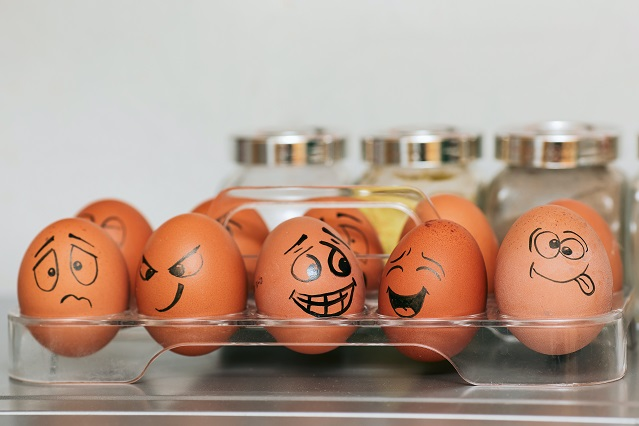

In [2]:
df_train = pd.read_csv('/kaggle/input/emotion-classification-nlp/emotion-labels-train.csv')
df_val = pd.read_csv('/kaggle/input/emotion-classification-nlp/emotion-labels-val.csv')
df_test = pd.read_csv('/kaggle/input/emotion-classification-nlp/emotion-labels-test.csv')

In [3]:
df_train

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy
...,...,...
3608,@VivienLloyd Thank you so much! Just home - st...,sadness
3609,Just put the winter duvet on ☃️❄️🌬☔️,sadness
3610,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness
3611,@BluesfestByron second artist announcement loo...,sadness


## Word2Vec

Word2Vec is a popular algorithm used for natural language processing (NLP) tasks, particularly in the field of word embeddings. It was introduced by researchers at Google in 2013 and has since become a widely adopted technique for capturing word representations in a continuous vector space.

### Basic Idea

The fundamental idea behind Word2Vec is to represent words as dense vectors, often referred to as word embeddings, in such a way that similar words are closer to each other in the vector space. The key intuition is that words appearing in similar contexts tend to have similar meanings.

### Architecture

Word2Vec comprises two primary architectures: Continuous Bag-of-Words (CBOW) and Skip-gram. These architectures are trained on large corpora of text to learn word embeddings.

1. Continuous Bag-of-Words (CBOW): In the CBOW architecture, the model predicts the target word given its surrounding context words. The context words are used as input features, and the target word is the output. CBOW is faster to train and tends to work well for smaller datasets.

2. Skip-gram: The skip-gram architecture, on the other hand, predicts the context words given a target word. The target word is used as input, and the context words are predicted as outputs. Skip-gram is slower to train but often performs better when there is a large amount of data available.

### Training Process

The training process involves feeding the Word2Vec model with a large amount of text data and adjusting the word embeddings to minimize the prediction error. The model utilizes a shallow neural network with a hidden layer to learn the word representations. The training objective is to maximize the probability of correctly predicting the context words given the target word (or vice versa).

### Applications

Word2Vec has various applications in natural language processing and related fields, including:

- **Semantic Similarity**: Word2Vec allows measuring the semantic similarity between words based on the distance between their embeddings.
- **Text Classification**: The learned word embeddings can be used as features for text classification tasks, improving performance.
- **Named Entity Recognition**: Word2Vec embeddings can help identify named entities by capturing their contextual information.
- **Information Retrieval**: Word2Vec can enhance search engines by understanding the semantic relationships between words and documents.
- **Machine Translation**: Word embeddings can be utilized to improve translation quality by capturing word meanings and contexts.

### Conclusion

Word2Vec is a powerful algorithm for generating word embeddings, enabling machines to capture semantic relationships between words. It has found broad applications in various NLP tasks and continues to be an essential component in many state-of-the-art models.


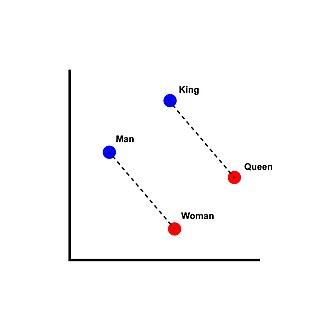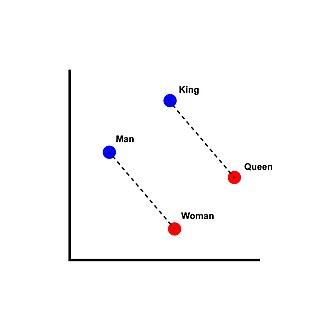

## EDA

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

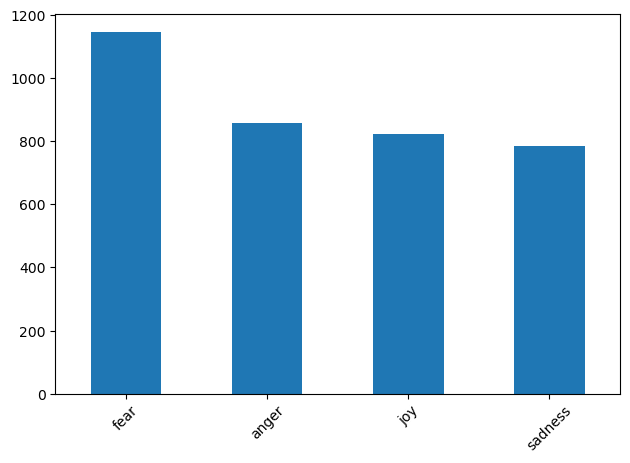

In [5]:
df_train['label'].value_counts().plot(kind = 'bar')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

## Data Cleaning

In [6]:
df_train['text']

0       Just got back from seeing @GaryDelaney in Burs...
1       Oh dear an evening of absolute hilarity I don'...
2       Been waiting all week for this game ❤️❤️❤️ #ch...
3       @gardiner_love : Thank you so much, Gloria! Yo...
4       I feel so blessed to work with the family that...
                              ...                        
3608    @VivienLloyd Thank you so much! Just home - st...
3609                Just put the winter duvet on ☃️❄️🌬☔️ 
3610    @SilkInSide @TommyJoeRatliff that's so pretty!...
3611    @BluesfestByron second artist announcement loo...
3612    I can literally eat creamy pesto pasta topped ...
Name: text, Length: 3613, dtype: object

### Removing Username Handles

In [7]:
import re

In [8]:
text = df_train['text'][0]
text

'Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious'

In [9]:
def remove_handle(text):
    string = re.sub(r"@\w+",' ', text)
    return string

In [10]:
remove_handle(text)

'Just got back from seeing   in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious'

### Removing \# Marks

In [11]:
text = df_train['text'][0]
text

'Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious'

In [12]:
def remove_hashtag(text):
    return re.sub(r' #',', ',text)

In [13]:
remove_hashtag(text)

'Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much, hilarious'

### Parsing Emojis to their meaning | ♥ -> Heart

In [14]:
import emoji

In [15]:
text = df_train['text'][2]

In [16]:
def parse_emoji(text):
    return emoji.demojize(text)

In [17]:
parse_emoji(text)

'Been waiting all week for this game :red_heart::red_heart::red_heart: #cheer #friday :red_heart:'

In [18]:
df_train['text'] = df_train['text'].apply(remove_handle)
df_train['text'] = df_train['text'].apply(remove_hashtag)
df_train['text'] = df_train['text'].apply(parse_emoji)

## Word2Vec

In [19]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

df_train['text'] = df_train['text'].apply(simple_preprocess)


In [20]:
df_train['text']

0       [just, got, back, from, seeing, in, burslem, a...
1       [oh, dear, an, evening, of, absolute, hilarity...
2       [been, waiting, all, week, for, this, game, re...
3       [thank, you, so, much, gloria, you, re, so, sw...
4       [feel, so, blessed, to, work, with, the, famil...
                              ...                        
3608    [thank, you, so, much, just, home, stunned, bu...
3609    [just, put, the, winter, duvet, on, snowman, s...
3610    [that, so, pretty, love, the, sky, in, the, ba...
3611    [second, artist, announcement, looking, good, ...
3612    [can, literally, eat, creamy, pesto, pasta, to...
Name: text, Length: 3613, dtype: object

In [21]:
import gensim

In [22]:
import gensim.downloader as api

In [23]:
gensim.downloader.info()['models'].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

In [24]:
model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [25]:
vocab = model.key_to_index.keys()

In [26]:
X = df_train['text'].apply(lambda sent: model.get_mean_vector([word for word in sent if word in vocab]) )

In [27]:
y = df_train['label'].map({'fear':0, 'anger':1, 'joy':2, 'sadness':3}).values

In [28]:
X = np.vstack(X)

In [29]:
def create_features(df):
    df['text'] = df['text'].apply(remove_handle)
    df['text'] = df['text'].apply(remove_hashtag)
    df['text'] = df['text'].apply(parse_emoji)
    df['text'] = df['text'].apply(simple_preprocess)
    X = df['text'].apply(lambda sent: model.get_mean_vector([word for word in sent if word in vocab]))
    X = np.vstack(X)
    y = df['label'].map({'fear':0, 'anger':1, 'joy':2, 'sadness':3})   
    return X, y.values
    

In [30]:
X_val, y_val = create_features(df_val)

## SVM

In [31]:
from sklearn import svm

clf = svm.SVC(kernel='poly')

clf.fit(X, y)

print(clf)

SVC(kernel='poly')


In [32]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_val)

report = classification_report(y_pred, y_val)

print(report)

              precision    recall  f1-score   support

           0       0.85      0.64      0.73       147
           1       0.58      0.70      0.64        70
           2       0.76      0.76      0.76        79
           3       0.45      0.65      0.53        51

    accuracy                           0.68       347
   macro avg       0.66      0.69      0.66       347
weighted avg       0.72      0.68      0.69       347



## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X, y)


y_pred_rf = rf.predict(X_val)


report_rf = classification_report(y_pred, y_val)


print(report_rf)


              precision    recall  f1-score   support

           0       0.85      0.64      0.73       147
           1       0.58      0.70      0.64        70
           2       0.76      0.76      0.76        79
           3       0.45      0.65      0.53        51

    accuracy                           0.68       347
   macro avg       0.66      0.69      0.66       347
weighted avg       0.72      0.68      0.69       347



## Gradient Bosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and fit the Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X, y)

# Predict the target variable for the training data
y_pred = gb.predict(X_val)

# Generate a classification report
report_gb = classification_report(y_pred, y_val)

# Print the classification report
print(report_gb)


              precision    recall  f1-score   support

           0       0.73      0.54      0.62       148
           1       0.52      0.60      0.56        73
           2       0.67      0.77      0.72        69
           3       0.45      0.58      0.50        57

    accuracy                           0.61       347
   macro avg       0.59      0.62      0.60       347
weighted avg       0.63      0.61      0.61       347



In [35]:
y_val.shape

(347,)

## SVM parameter tuining - Grid Search

In [36]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4]
}

# Create the SVM classifier
clf = svm.SVC(kernel='poly')

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'C': 1, 'degree': 4, 'gamma': 10}
Best Score:  0.7073945510204863


## Testing Best model no Test Data

In [37]:
from sklearn import svm

# Create the SVM classifier with the specified parameters
clf = svm.SVC(kernel='poly', C=1, degree=4, gamma=10)

# Fit the classifier to the data
clf.fit(X, y)

# Print the trained classifier
print(clf)


SVC(C=1, degree=4, gamma=10, kernel='poly')


In [38]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_val)

report = classification_report(y_pred, y_val)

print(report)

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       120
           1       0.58      0.64      0.61        76
           2       0.82      0.79      0.81        82
           3       0.61      0.65      0.63        69

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.70       347



## Custom Input

In [39]:
def create_features_text(text):
    text = remove_handle(text)
    text = remove_hashtag(text)
    text = parse_emoji(text)
    text = simple_preprocess(text)
    print([word for word in text if word in vocab])
    X = model.get_mean_vector([word for word in text if word in vocab])
    X = np.vstack(X)
    return X

In [40]:
model.get_mean_vector(['why'])

array([ 6.70078397e-02,  5.51193533e-03,  9.64048281e-02,  1.34556070e-02,
       -4.02047038e-02,  1.71842687e-02,  5.40385805e-02, -2.98292972e-02,
        8.73263478e-02,  2.83162165e-02, -9.56482906e-03, -8.34355727e-02,
        2.89646797e-02, -2.78839078e-02, -1.12400249e-01,  1.59089580e-01,
        2.86404486e-03, -7.52217025e-02, -6.44139871e-02, -2.16154326e-02,
        2.87485253e-02,  1.81029248e-03,  1.64277293e-02,  2.26962045e-02,
       -9.85663757e-02,  3.97723950e-02,  3.84754688e-02,  3.22069936e-02,
        3.48008461e-02,  1.66438837e-02,  8.37597996e-03,  1.14129484e-01,
       -1.14561794e-02, -2.68031359e-02,  2.85323709e-02,  2.39931308e-02,
        3.67462374e-02, -1.25909895e-02,  3.32877673e-02,  3.63139287e-02,
        1.15858719e-01,  1.29152210e-02,  4.69054878e-02, -9.89986807e-02,
       -4.75539528e-02,  9.40271281e-03, -2.09399499e-03, -5.96585944e-02,
       -6.74401522e-02,  6.35493696e-02, -5.46870455e-02, -3.56654637e-02,
        2.28042807e-02, -

In [41]:
X_input = create_features_text("Nice weather today loving it  ♥")

['nice', 'weather', 'today', 'loving', 'it']


In [42]:
X_input = X_input.reshape(-1,300)

In [43]:
lst = ["fear", "anger", "joy", "sadness"]
labels_mapping = dict(zip(range(4),lst))

In [44]:
labels_mapping[clf.predict(X_input).item()]

'joy'